<a href="https://colab.research.google.com/github/rtajeong/Kyungnam_univ_M4/blob/main/lab_68_yolo_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yolo: Real-Time Object Detection
- https://pjreddie.com/darknet/yolo/
- You only look once (YOLO) is a state-of-the-art, real-time object detection system. On a Pascal Titan X it processes images at 30 FPS and has a mAP of 57.9% on COCO test-dev.

### how it works?
- 이전 검출 시스템은 검출을 수행하기 위해 분류기 또는 유도기를 용도에 맞게 변경한다. 그것은 위치와 눈금을 여러개로 이미지에 적용한다. 이미지영역의 점수가 높으면 검출로 간주한다.
- Yolo 에서는 완전히 다른 접근방식을 사용한다. 전체이미지에 단일 신경망을 적용한다. 이 망은 이미지를 여러 영역으로 나누고, 그리고 경계상자와 각 영역에 대한 확률을 예측한다. 이러한 경계상자는 예측된 확률로 가중된 것이다.
- Yolo 모델은 분류기 기반 시스템에 비해 몇가지 장점을 가진다. 평가시 이미지전체 를 확인한다 그래서 이것의 예측은 이미지에서 전체맥락으로 된 정보이다. 이것은 또한 하나의 이미지에 수천개가 필요한 R-CNN 과 달리 하나의 망으로 평가하여 예측한다. 이것은 극도로 빠르게 한다, R-CNN보다 1000배 더 빠르다 그리고 Fast R-CNN 보다 100배 빠르다.
## detection
- cfg/ 아래 모든 설정 파일들이 있으며, 인터넷으로부터 가중치 값을 가져와야 한다. 시간이 50 분 이상 걸리기 때문에 아래의 Yolov3-tiny 를 대신 실행해 보기 바란다.

- clone a repository into a new directory (weights 237 M)
  - takes long time to download the weight file
- darknet: neural network open source coded in c (https://pjreddie.com/adardknet)

In [1]:
# 다른 프로젝트에 참여하려거나(Contribute) Git 저장소를 복사하고 싶을 때 git clone 명령을 사용한다.
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make

Cloning into 'darknet'...
remote: Enumerating objects: 5931, done.
remote: Total 5931 (delta 0), reused 0 (delta 0), pack-reused 5931
Receiving objects: 100% (5931/5931), 6.34 MiB | 32.32 MiB/s, done.
Resolving deltas: 100% (3922/3922), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.

In [3]:
!pwd

/content/darknet


In [ ]:
# download the weight file - takes long time !
!wget https://pjreddie.com/media/files/yolov3.weights

- just to copy the prestored weight file

In [4]:
# I will just copy pre-stored weight file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp ../drive/'My Drive'/DSAC_exercise_for_me/yolov3.weights .

In [6]:
!ls -l

total 244456
drwxr-xr-x 2 root root      4096 Jan 24 04:28 backup
drwxr-xr-x 2 root root      4096 Jan 24 04:28 cfg
-rwxr-xr-x 1 root root    730568 Jan 24 04:28 darknet
drwxr-xr-x 3 root root      4096 Jan 24 04:28 data
drwxr-xr-x 2 root root      4096 Jan 24 04:28 examples
drwxr-xr-x 2 root root      4096 Jan 24 04:28 include
-rw-r--r-- 1 root root    832718 Jan 24 04:28 libdarknet.a
-rwxr-xr-x 1 root root    622776 Jan 24 04:28 libdarknet.so
-rw-r--r-- 1 root root       515 Jan 24 04:28 LICENSE
-rw-r--r-- 1 root root       474 Jan 24 04:28 LICENSE.fuck
-rw-r--r-- 1 root root      6652 Jan 24 04:28 LICENSE.gen
-rw-r--r-- 1 root root     35141 Jan 24 04:28 LICENSE.gpl
-rw-r--r-- 1 root root       360 Jan 24 04:28 LICENSE.meta
-rw-r--r-- 1 root root      1071 Jan 24 04:28 LICENSE.mit
-rw-r--r-- 1 root root       461 Jan 24 04:28 LICENSE.v1
-rw-r--r-- 1 root root      3040 Jan 24 04:28 Makefile
drwxr-xr-x 2 root root      4096 Jan 24 04:28 obj
drwxr-xr-x 2 root root      4096 Jan 24 04:

In [7]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

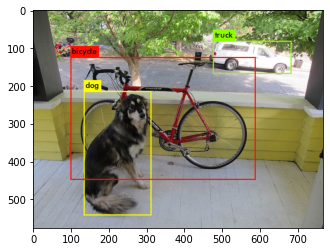

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('predictions.jpg')

# Show the original image
plt.imshow(img)

- darknet 은 검출객체, 신뢰도, 찾는데 걸린 시간을 출력한다.
- data 폴더 밑에 eagle.jpg, dog.jpg, person.jpg, horses.jpg 를 실행해 보기 바람.
- 위의 detect 명령은 다음 명령의 줄인 버전임.
  - ./darknet detector test cfg/coco.data cfg/yolo.cfg yolo.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

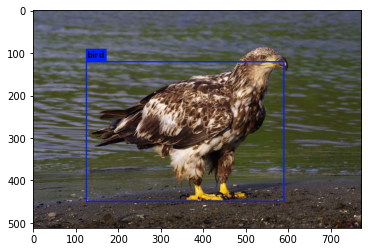

In [9]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/eagle.jpg
img = mpimg.imread('predictions.jpg')
plt.imshow(img)

## Multiple images

- 아래 명령을 주면 소스 영상을 입력하라는 메시지가 나오고 그때 입력 영상을 넣어 주면 된다.
- 마치고 싶을 떄는 Ctl-C 를 하면 된다.

In [ ]:
!./darknet detect ./cfg/yolov3.cfg yolov3.weights   # give input /data/horses.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

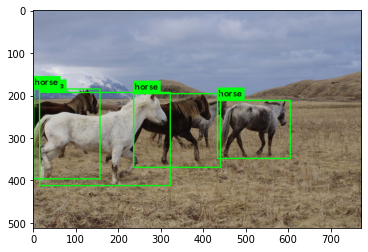

In [ ]:
img = mpimg.imread('predictions.jpg')
plt.imshow(img)

# YOLOv3-tiny
- tiny version for yolov3
- 33.79 M 로 다운받는데 7분 정도 걸림

In [ ]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2020-12-08 07:42:35--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M   107KB/s    in 6m 52s  

2020-12-08 07:49:29 (83.9 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [ ]:
!./darknet detect cfg/yolov3-tiny.cfg yolov3-tiny.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     16  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  16  0.150 BFLOPs
    1 max          2 x 2 / 2   416 x 416 x  16   ->   208 x 208 x  16
    2 conv     32  3 x 3 / 1   208 x 208 x  16   ->   208 x 208 x  32  0.399 BFLOPs
    3 max          2 x 2 / 2   208 x 208 x  32   ->   104 x 104 x  32
    4 conv     64  3 x 3 / 1   104 x 104 x  32   ->   104 x 104 x  64  0.399 BFLOPs
    5 max          2 x 2 / 2   104 x 104 x  64   ->    52 x  52 x  64
    6 conv    128  3 x 3 / 1    52 x  52 x  64   ->    52 x  52 x 128  0.399 BFLOPs
    7 max          2 x 2 / 2    52 x  52 x 128   ->    26 x  26 x 128
    8 conv    256  3 x 3 / 1    26 x  26 x 128   ->    26 x  26 x 256  0.399 BFLOPs
    9 max          2 x 2 / 2    26 x  26 x 256   ->    13 x  13 x 256
   10 conv    512  3 x 3 / 1    13 x  13 x 256   ->    13 x  13 x 512  0.399 BFLOPs
   11 max          2 x 2 / 1    13 x  13 x 512   ->    13 x  13 x 512
   12 con

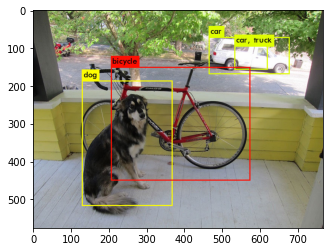

In [ ]:
img = mpimg.imread('predictions.jpg')
plt.imshow(img)

- 더 많은 yolo 사용법에 대해서는 아래 사이트를 참고한다.
  https://zeuseyera.github.io/darknet-kr/2_YOLO/yolo.html
- 웹캠이나 동영상에서의 동작을 위해서는 opencv 와 웹캠이 필요함. (opencv 가 동영상을 읽음)
  - ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights <video file>